---
title: "Multivariate Gaussian Distribution"
description: KAIST Data Science Programming 1 - 4.1 Multivariate Gaussian Distribution 에 대한 내용입니다.
date: 2023-10-24
author: "Chanseok Kang"
toc: true 
categories: [Python, KAIST, Statistics]
title-block-banner: true
---

## Relation between Two Random Variables

2개의 random variables로 구성된 분포에서 정보를 얻고자 할 때 가장 처음 시도해볼 수 있는 것이 바로 [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot)이다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

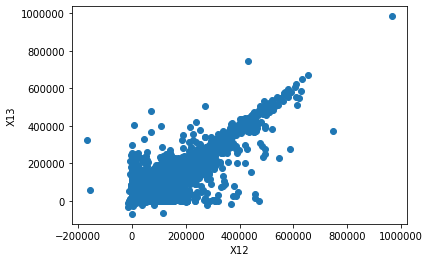

In [3]:
objData = pd.read_excel('./default of credit card clients.xls', skiprows=[1, 2])
plt.scatter(x=objData['X12'], y=objData['X13'])
plt.xlabel('X12')
plt.ylabel('X13')
plt.show()

위의 그림에서도 보이듯 이 scatterplot을 통해서 random variable 간의 correlation이나 outlier의 유무, 어디에 밀집되어 있는지 등의 정보를 얻을 수 있다.
이렇게 variable이 2개이상인 multivariate distribution에서 variable간의 관계를 측정(measure)하기 위해서는 결국 해당 distribution을 표현할 수 있는 model을 만들어야 한다. 이번 장에서는 Multivariate Gaussian(Normal) Distribution을 대상으로 설명한다.

## Multivariate Gaussian Distribution

Gaussian Distribution의 probability density function은 아래와 같이 정의할 수 있다.

$$
\mathcal{N}(x \vert \mu, \sigma^2) =  \frac{1}{\sqrt{2 \pi \sigma^2}} \exp(- \frac{1}{2 \sigma^2}(x - \mu)^2)
$$

이를 Multivariate로 확장하게 되면, 기존에 sample의 standard deviation ($\sigma^2$)를 사용하던게 Covariance ($\Sigma$)로 변하게 되고, 표현식이 행렬 형태로 주어지게 된다.

$$
\mathcal{N}(x \vert \mu, \Sigma) = \frac{1}{(2\pi)^{D/2}} \frac{1}{\vert \Sigma \vert^{1/2}} \exp (-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu))
$$

(참고로 $D$ 는 distribution의 dimension을 나타냄)

위 식에 대한 MLE Solution을 구해보려면 우선 주어진 분포에 대한 log likelihood를 계산해볼 수 있다. 
(pdf내에 exponential form이 있기 때문에 log likelihood를 사용하면 해당 form을 줄일 수 있다.)

$$
\begin{aligned}
\ln \mathcal{N}(x \vert \mu, \Sigma) &= -\frac{1}{2} \ln | \Sigma | - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) + C \quad (\text{Vector form}) \\
&= -\frac{1}{2} \ln | \Sigma | - \frac{1}{2} \sum^N_{n=1} (x_n - \mu)^T \Sigma^{-1} (x_n - \mu) + C \quad (\text{Element form})
\end{aligned}
$$

여기서 [trace trick](https://statisticaloddsandends.wordpress.com/2019/12/29/the-trace-trick-and-the-expectation-of-a-quadratic-form/) 이라는 것을 쓰면, 중간의 $\Sigma^{-1}$ 부분을 따로 뺄수 있게 된다.

> **_NOTE:_**  Trace trick을 간단하게 요약하면 다음과 같다. 1) $\frac{d}{dA} \log |A| = A^{-T}  \quad$, 2) $\frac{d}{dA}Tr[AB] = \frac{d}{dA}Tr[BA] = B^T$

그러면 정확한 값은 아니지만 기존의 값과 비례하는 형태로 아래와 같이 정리할 수 있다.

$$
\begin{aligned}
\ln \mathcal{N}(x \vert \mu, \Sigma) &\propto -\frac{1}{2} \ln | \Sigma | - \frac{1}{2} \sum^N_{n=1} Tr [ \Sigma^{-1}(x_n - \mu)(x_n - \mu)^T] \\
&= -\frac{1}{2} \ln | \Sigma | - \frac{1}{2} Tr[\Sigma^{-1} \sum^N_{n=1} ((x_n - \mu)(x_n - \mu)^T)]
\end{aligned}
$$

이중 뒤에 있는 $\sum^N_{n=1} ((x_n - \mu)(x_n - \mu)^T)$ 부분은 각 sample을 mean 값으로 빼준 것에 대한 총합이므로 결국 variance라는 것을 알 수 있고, log likelihood가 variance에 비례하다는 결론을 얻을 수 있다. 

Log-likelihood의 optimization을 위해서, 위 식을 각각의 변수 ($\mu, \Sigma$)로 미분하고, 미분한 식에 대한 solution을 구해보면 다음과 같이 된다.

$$
\frac{d}{d\mu} \ln \mathcal{N}(X \vert \mu, \Sigma) = 0 \rightarrow -\frac{1}{2} \times 2 \times -1 \times \Sigma^{-1} \sum^N_{n=1}(x_n - \hat{\mu}) = 0 \\
\hat{\mu} = \frac{\sum^N_{n=1}x_n}{N}
$$

$$
\frac{d}{d\Sigma^{-1}} \ln \mathcal{N}(X \vert \mu, \Sigma) = 0 \\
\hat{\Sigma} = \frac{1}{N} \sum^N_{n=1}(x_n - \hat{\mu})(x_n - \hat{\mu})^T
$$

이렇게 Estimated MLE Solution을 구하면 결국 mean 값은 기존 sample의 mean과 동일하고, covariance는 기존 sample의 variance를 sample의 크기로 나눠준 형태와 동일하다는 것을 확인할 수 있다.